Análisis Exploratorio de Datos

Este trabajo tiene como objetivo analizar y comprender el comportamiento del sector de telecomunicaciones en Argentina a nivel nacional. El cliente, una empresa enfocada principalmente en la provisión de servicios de internet, busca aumentar el acceso a este servicio en todo el país. No obstante, para garantizar que se proporcionen datos pertinentes y útiles para la toma de decisiones estratégicas, es fundamental considerar también los demás servicios de comunicación en el análisis.

En el presente documento, se detalla paso por paso los procedimientos realizados para llevar adelante el análisis requerido, el que se vale fundamentalmente de los datos públicos ofrecidos por el Ente Nacional de Comunicaciones (ENACOM).

En el procedimiento de ETL se ha realizado la carga y corrección de datos, revisando los formatos, los valores nulos y valores faltantes. También se ha realizado una limpieza de cadenas de texto, corregido los formatos erróneos, y manejado los valores duplicados Además, se ha hecho una inspección preliminar, para determinar qué datos podían ser de interés para este informe.

En esta nueva instancia, se procederá a un análisis de las tablas seleccionadas por su relevancia, el cual pretende ser mucho más profundo que el primero. En él se intentará identificar patrones, outliers, comportamientos de los datos y su implicancia en el sector de telecomunicaciones en Argentina.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
acc_tecc = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Accesos_tecnologia.csv')
dial_BAf = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Dial-BAf.csv')
ingresos = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Ingresos.csv')
penetracion_hogares = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Penetracion hogares.csv')
penetracion_poblacion = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Penetración población.csv')
Totales_accesos_tecn = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Totales Accesos Por Tecnología.csv')
totales_VMD = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Totales VMD.csv')
Velocidad_provincia = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Velocidad % por prov.csv')
penetracion_total = pd.read_csv(r'C:\Users\EFRAIN LINARES\Desktop\Proyecto 2\Data_clean\Penetracion total.csv')

Promedio de accesos por cada 100 Hogares

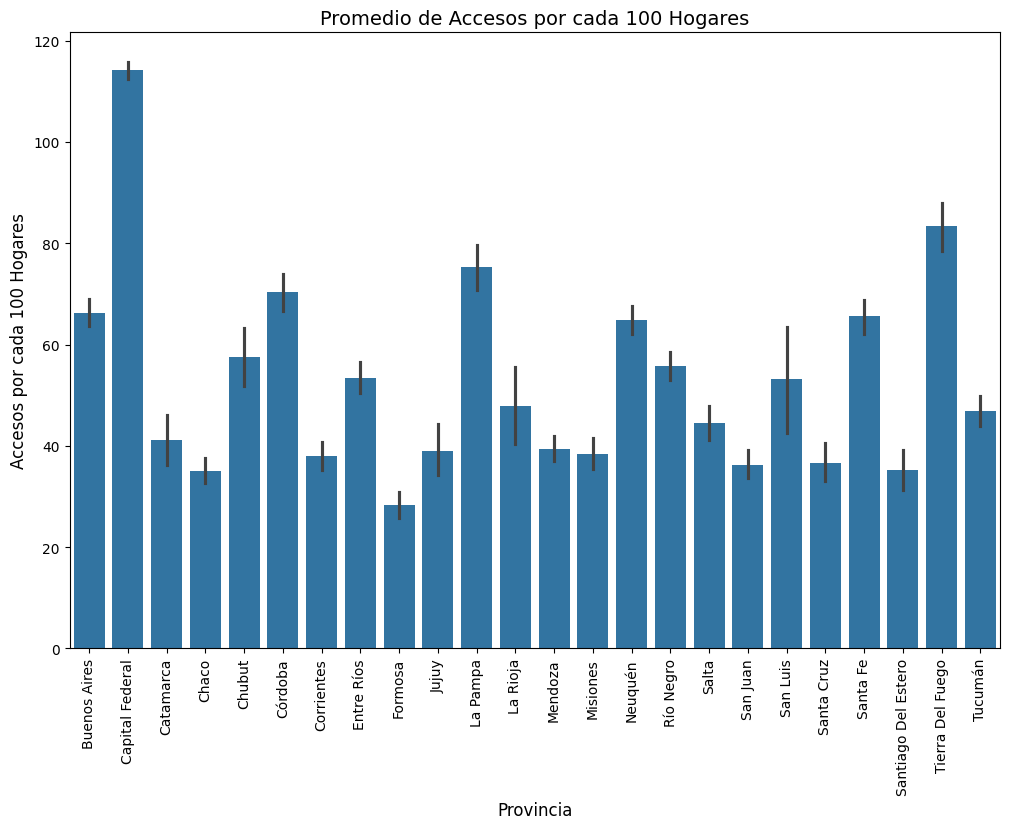

In [9]:
# Ajustar el tamaño de las fuentes
plt.figure(figsize=(12,8 ))
sns.barplot(x="Provincia", y="Accesos por cada 100 hogares", data=penetracion_hogares)
plt.xticks(rotation=90, fontsize=10)  # Ajustar el tamaño de la fuente de las etiquetas del eje x
plt.yticks(fontsize=10)  # Ajustar el tamaño de la fuente de las etiquetas del eje y
plt.title("Promedio de Accesos por cada 100 Hogares", fontsize=14)  # Ajustar el tamaño de la fuente del título
plt.xlabel("Provincia", fontsize=12)  # Ajustar el tamaño de la fuente de la etiqueta del eje x
plt.ylabel("Accesos por cada 100 Hogares", fontsize=12)  # Ajustar el tamaño de la fuente de la etiqueta del eje y
plt.show()

Se puede ver una gran disparidad en el acceso a internet por provincia. La Ciudad Autónoma de Buenos Aires lidera con más de 100 accesos por cada 100 hogares, mientras que provincias como Chaco, Formosa, y Santiago del Estero tienen menos de 50 accesos.

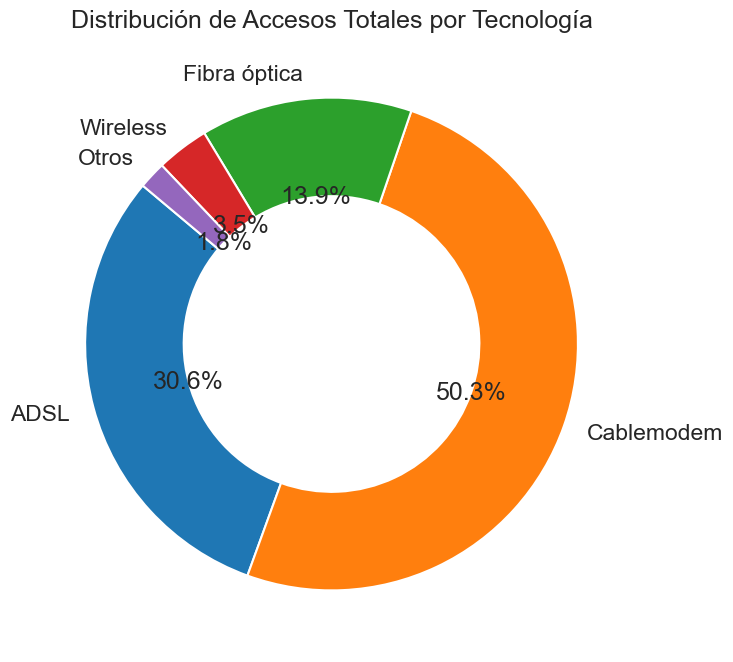

In [50]:
# Sumar los accesos por cada tecnología
tecnologias = ['ADSL', 'Cablemodem',  'Fibra óptica', 'Wireless', 'Otros']
total_tecnologias = Totales_accesos_tecn[tecnologias].sum()

# Si prefieres un gráfico de rosca, puedes usar:
plt.figure(figsize=(15,8))
plt.pie(total_tecnologias, labels=tecnologias, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title('Distribución de Accesos Totales por Tecnología')
plt.show()

En este gráfico podemos analizar la distribución de las distintas tecnologías disponibles en el mercado, confirmando la primacía de Cablemodem y la ADSL.

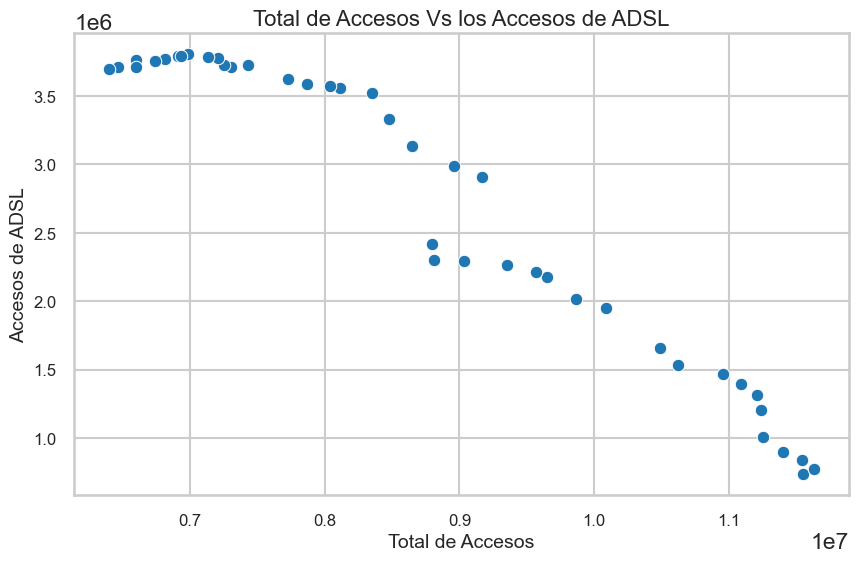

In [52]:
# Gráfico de dispersión entre el Total de accesos y ADSL
plt.figure(figsize=(10, 6))  # Ajusté el tamaño de la figura para mejor visualización
sns.scatterplot(x="Total", y="ADSL", data=Totales_accesos_tecn)  # Ejemplo usando ADSL como variable Y
# Ajustes de texto
plt.title("Total de Accesos Vs los Accesos de ADSL", fontsize=16)
plt.xlabel("Total de Accesos", fontsize=14)
plt.ylabel("Accesos de ADSL", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Mostrar gráfico
plt.show()

Podemos ver la relación entre el Total de Accesos a Internet y los Accesos a través de ADSL. Se observa una tendencia decreciente, donde a medida que aumenta el total de accesos, los accesos por ADSL disminuyen. Esto indica un desplazamiento del uso de ADSL hacia otras tecnologías más modernas y eficientes, reflejando la transición tecnológica en el acceso a internet en Argentina.

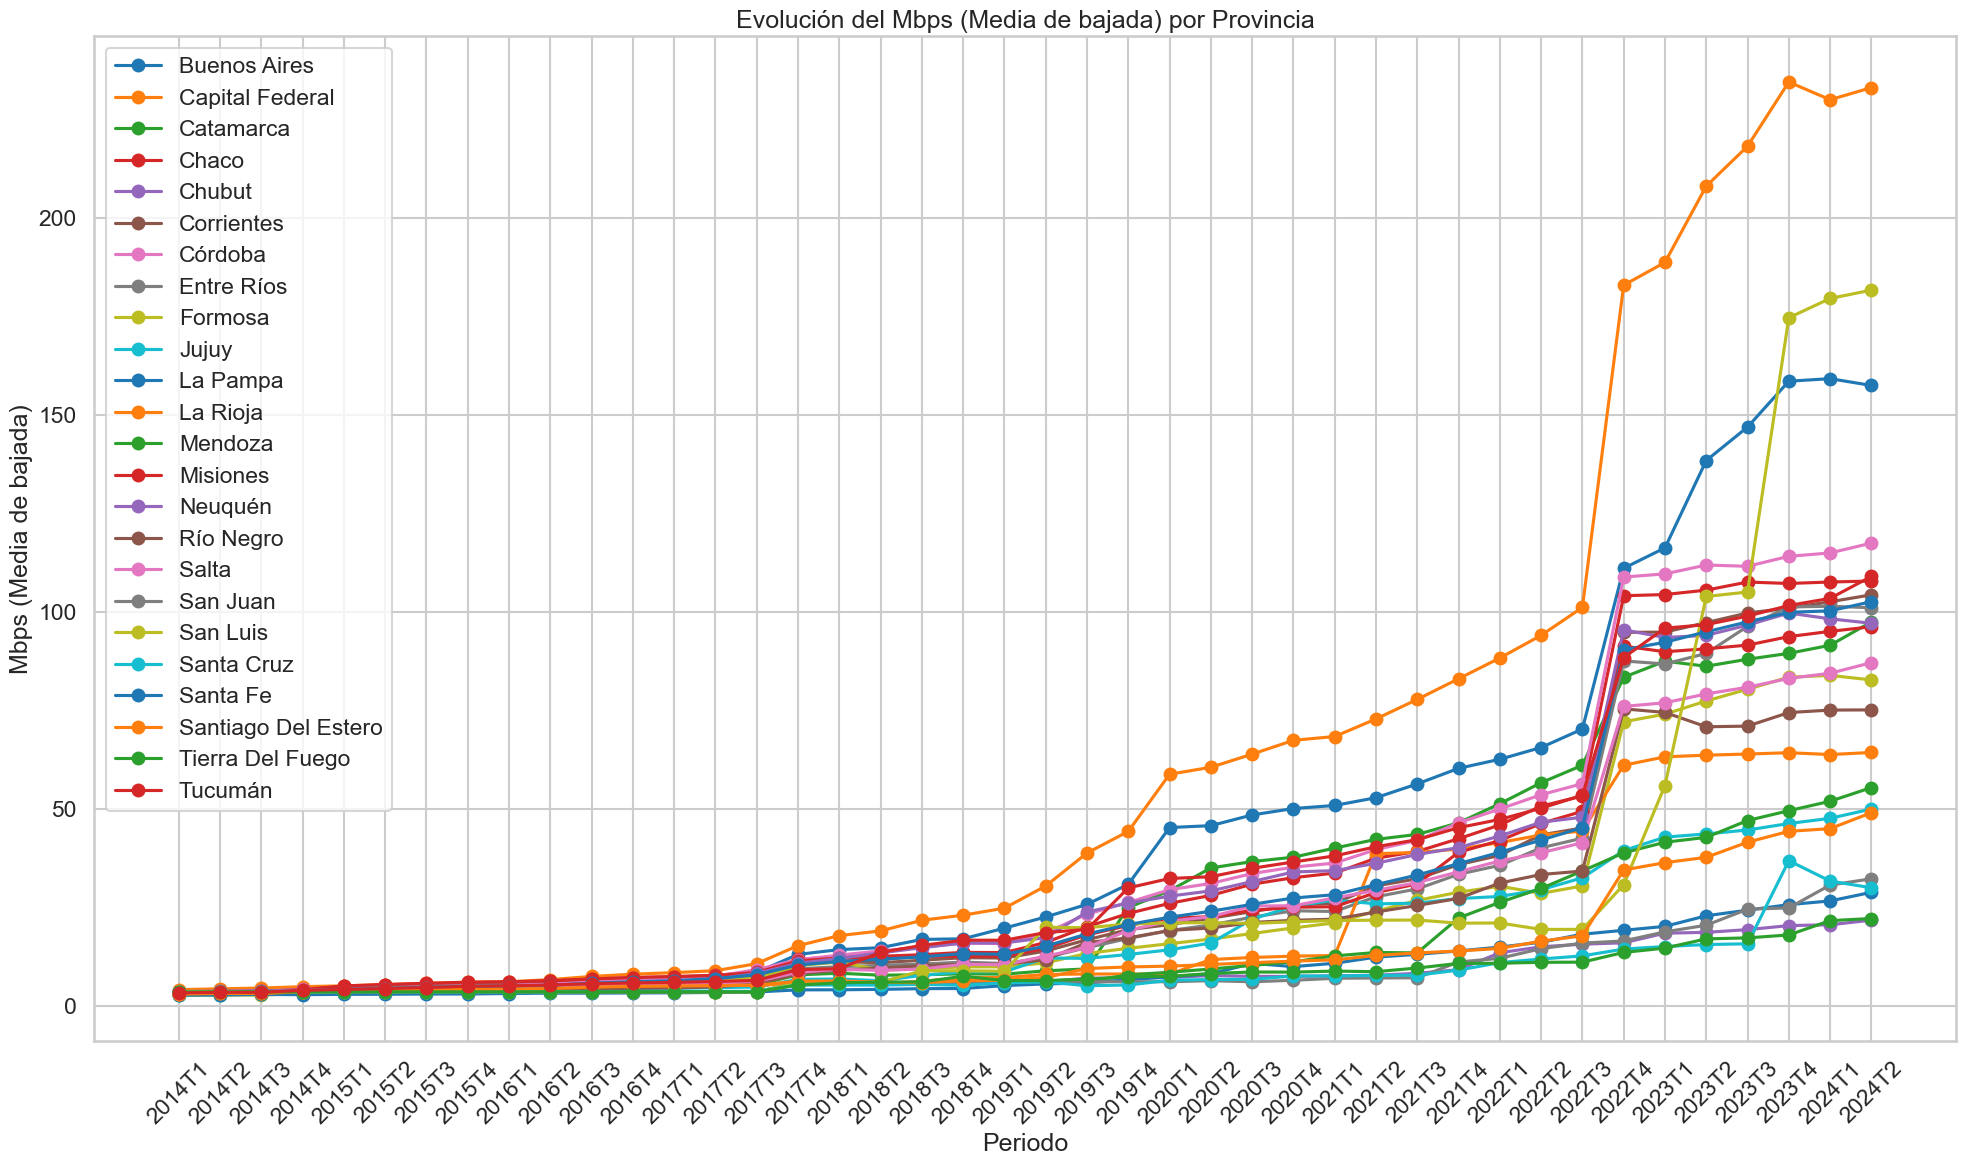

In [63]:
Velocidad_provincia['Periodo'] = Velocidad_provincia['Año'].astype(str) + 'T' + Velocidad_provincia['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico

df_pivot = Velocidad_provincia.pivot(index='Periodo', columns='Provincia', values='Mbps (Media de bajada)')

plt.figure(figsize=(20, 12))
for provincia in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[provincia], marker='o', label=provincia)

plt.title('Evolución del Mbps (Media de bajada) por Provincia')
plt.xlabel('Periodo')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
Velocidad_provincia.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

En este primer análisis, sectorizado por Provincias, podemos ver que la velocidad media de descarga se destaca en la Ciudad Autónoma de Buenos Aires. Tiene mucho sentido: hablamos de una metrópolis, con gran densidad poblacional, en la que se suelen instalar grandes empresas multinacionales. En consecuencia, las inversiones en el rubro son mayores, aunque esto no es más que una especulación (en esta instancia) que podrá ser confirmada con mayores datos. Lo que sí podemos concluir desde este primer grafo, es que en Provincias como Buenos Aires, de una enorme extensión territorial (y con menor densidad poblacional), se encuentran peor posicionadas en éstos términos.

No obstante, se puede osbservar un enorme crecimiento en todas las provincias desde el 2017 a la actualidad, con un marcado ascenso a partir del año 2020, y un fuerte crecimiento desde la segunda mitad del año 2022.

Para confimar estas tendencias, es procedente analizar la evolución total a nivel nacional.

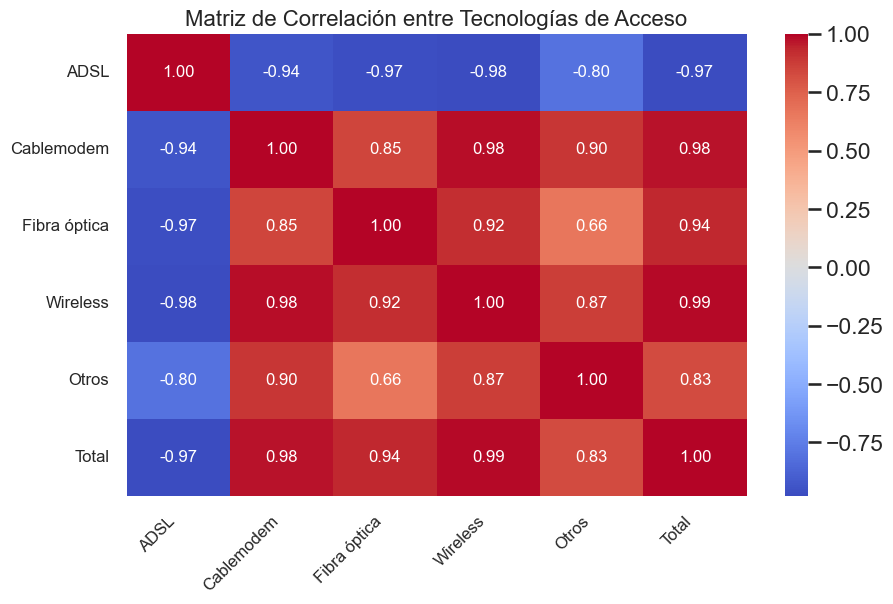

In [71]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))
# Crear la matriz de correlación
corr = Totales_accesos_tecn[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].corr()
# Crear el heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 12})
# Ajustar el título y las etiquetas
plt.title("Matriz de Correlación entre Tecnologías de Acceso", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.show()

La matriz de correlación muestra que Cablemodem y Fibra Óptica están fuertemente correlacionadas con el total de accesos a internet, indicando su importancia en la penetración del servicio. En contraste, ADSL tiene menor correlación con tecnologías más modernas, sugiriendo su declive frente a opciones más avanzadas.

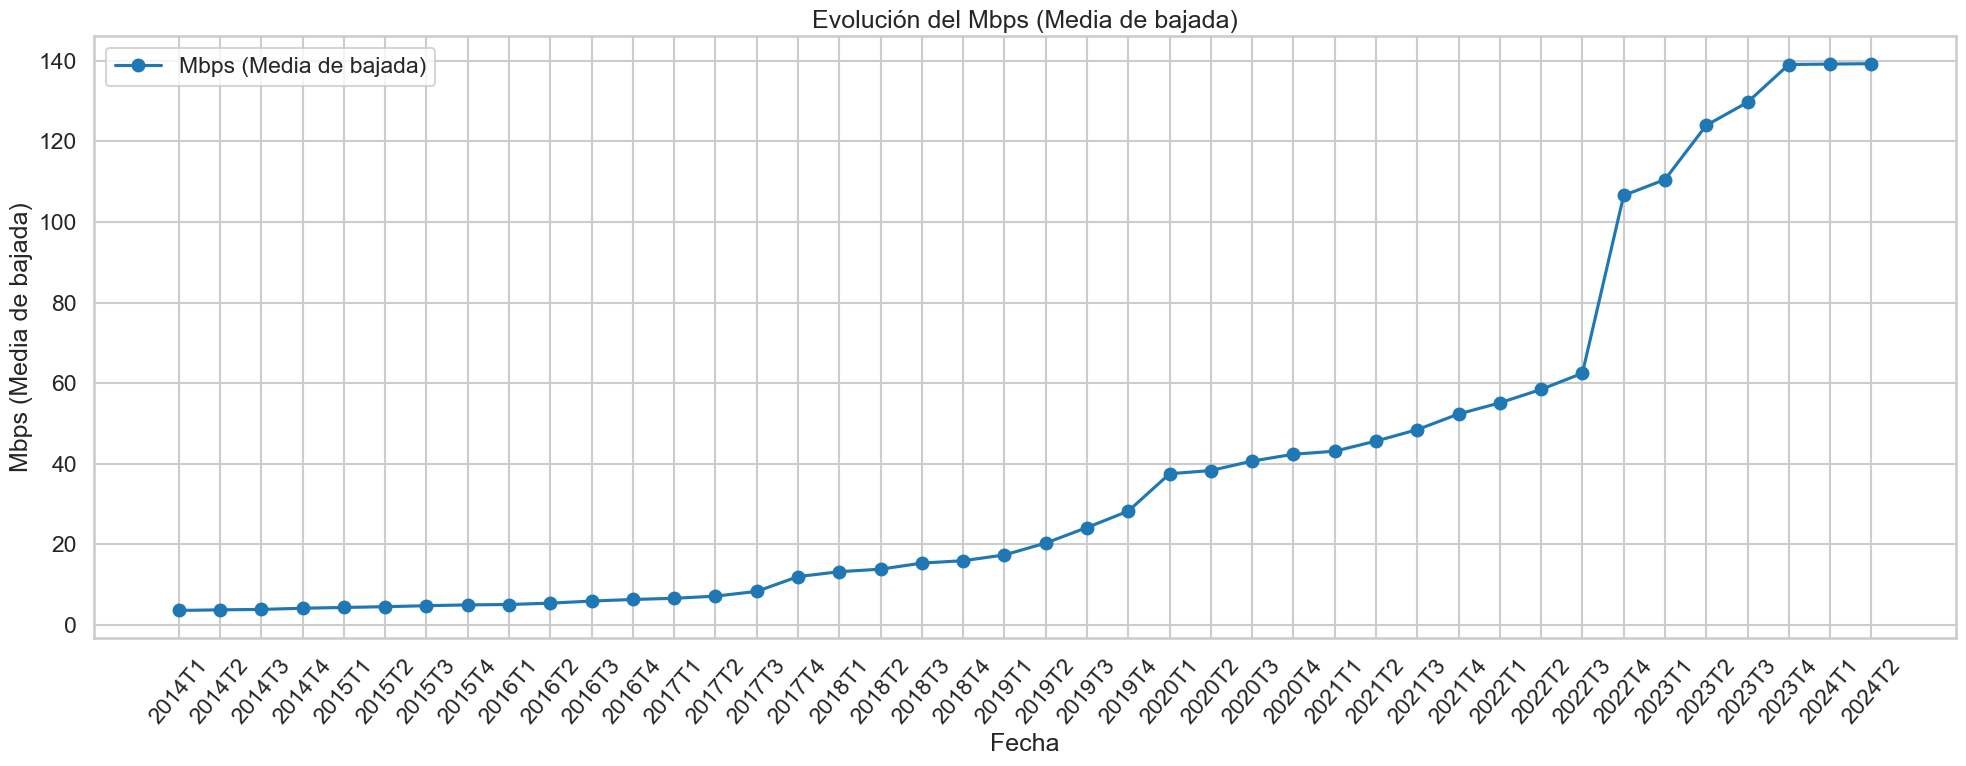

In [99]:
totales_VMD['Periodo'] = totales_VMD['Año'].astype(str) + 'T' + totales_VMD['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico
totales_VMD = totales_VMD.iloc[::-1] #invertimos el orden de los registros para acomodar el gráfico


plt.figure(figsize=(20, 8))
plt.plot(totales_VMD['Periodo'], totales_VMD['Mbps (Media de bajada)'], marker='o', label='Mbps (Media de bajada)')

plt.title('Evolución del Mbps (Media de bajada)')
plt.xlabel('Fecha')
plt.ylabel('Mbps (Media de bajada)')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

totales_VMD.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

Efectivamente, con esta nueva información podemos confirmar la tendencia a nivel nacional: el crecimiento de la velocidad de bajada es sostenido, casi sin la existencia de períodos en los que haya una baja en el promedio de velocidad de descarga.

Luego, podemos observar períodos con una tendencia al crecimiento a mayor velocidad. Identificamos un primer pico en el primer trimestre del año 2020. Puede explicarse por motivos históricos: la pandemia global por Covid-19 trajo aparejado no sólo un mayor consumo, sino un despliegue de programas orientados al desarrollo de la conectividad, incentivos para el recambio y la actualización tecnológica; según informa el ENACOM en este enlace.

Este tipo de programas también explican un crecimiento excepcional de la velocidad durante el tercer trimestre del año 2022, lo que también surge a partir de la consolidación de trabajos remotos, lo que implicó mejorar las conexiones para poder desempeñarse. El trabajo remoto se ha consolidado exitosamente en Argentina.

Es interesante analizar las diferentes tecnologías utilizadas en el país (vistas en el primer punto del presente análisis), extendida a lo largo del tiempo.

In [88]:
#Verificamos la existencia de outliers
q1 = totales_VMD['Mbps (Media de bajada)'].quantile(0.25)
q3 = totales_VMD['Mbps (Media de bajada)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = totales_VMD[(totales_VMD['Mbps (Media de bajada)'] < lower_bound) | (totales_VMD['Mbps (Media de bajada)'] > upper_bound)]
print(f'Columna: {"Mbps (Media de bajada)"}, Outliers: {outliers.shape[0]}')

Columna: Mbps (Media de bajada), Outliers: 5


Podemos observar que los outliers son considerablemente bajos, y se trata de una fuente de información confiable, por lo que no afectan el análisis previo.

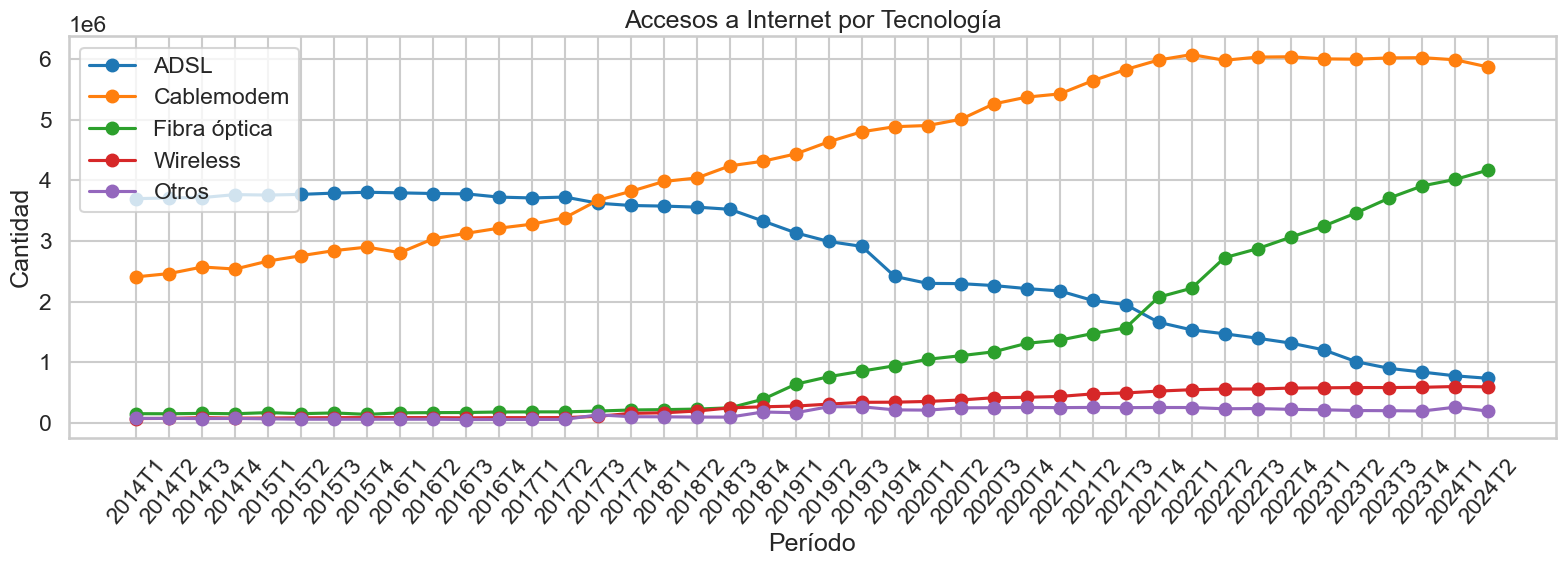

In [98]:
Totales_accesos_tecn['Periodo'] = Totales_accesos_tecn['Año'].astype(str) + 'T' + Totales_accesos_tecn['Trimestre'].astype(str) #Primero creamos una columna que contenga
#la información del período (año y trimestre), para llevar a nuestro gráfico
Totales_accesos_tecn = Totales_accesos_tecn.iloc[::-1]

columnas_grafico = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

plt.figure(figsize=(16, 6))

for columna in columnas_grafico:
    plt.plot(Totales_accesos_tecn['Periodo'], Totales_accesos_tecn[columna], marker='o', label=columna)

plt.title('Accesos a Internet por Tecnología')
plt.xlabel('Período')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()
Totales_accesos_tecn.drop(columns='Periodo', inplace=True) #Eliminamos la columna que creamos para el gráfico.

La medición de las tecnologías utilizadas durante la última década, nos permiten sacar algunas conclusiones asociadas a la velocidad de descarga.
En primer lugar, hemos de decir que las conexiones de banda ancha a través de líneas telefónicas de cobre convencionales (ADSL o Asymmetric Digital Subscriber Line) ha disminuido considerablemente. Encuentra su principal explicación en su reemplazo por Cablemodem, que es mucho más confiable por utilizar cable coaxial (el mismo que el utilizado para la televisión por cable), además de ser más económico. Pueden analizarse mejor sus diferencias aquí.
Pero también observamos un aumento en las conexiones por fibra óptica. En los últimos 4 años se observa un crecimiento exponencial, respecto a los valores del primer trimestre del año 2019. Podemos confirmarlo con los propios informes de la ENACOM.
Estas tendencias dan cuenta de que carece de sentido realizar un análisis histórico tan abierto, ya que la tecnología ha cambiado considerablemente. Parece pertinente limitar los análisis a lo ocurrido desde el año 2019 en adelante.

Dicho ello, podemos realizar algunas apreciaciones cuantitativas y cualitativas de relevancia:

Los accesos ADSL se han reducido considerablemente.

Ha aumentado el número de accesos Cablemodem, posicionándose como la más utilizada; aunque notamos un estancamiento desde el año 2022.

Las conexiones de Fibra Óptica han aumentado sostenidamente desde 2018.

En 2021 se profundizó la tendencia a la alza de los accesos a Fibra Óptica.

Las tecnologías Wireless y otras no tienen grandes variaciones desde el inicio del análisis.

In [100]:
#Verificamos la existencia de outliers
for column in ['ADSL', 'Cablemodem','Fibra óptica', 'Wireless', 'Otros']:
    q1 = Totales_accesos_tecn[column].quantile(0.25)
    q3 = Totales_accesos_tecn[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = Totales_accesos_tecn[(Totales_accesos_tecn[column] < lower_bound) | (Totales_accesos_tecn[column] > upper_bound)]
    print(f'Columna: {column}, Outliers: {outliers.shape[0]}')

Columna: ADSL, Outliers: 0
Columna: Cablemodem, Outliers: 0
Columna: Fibra óptica, Outliers: 0
Columna: Wireless, Outliers: 0
Columna: Otros, Outliers: 0


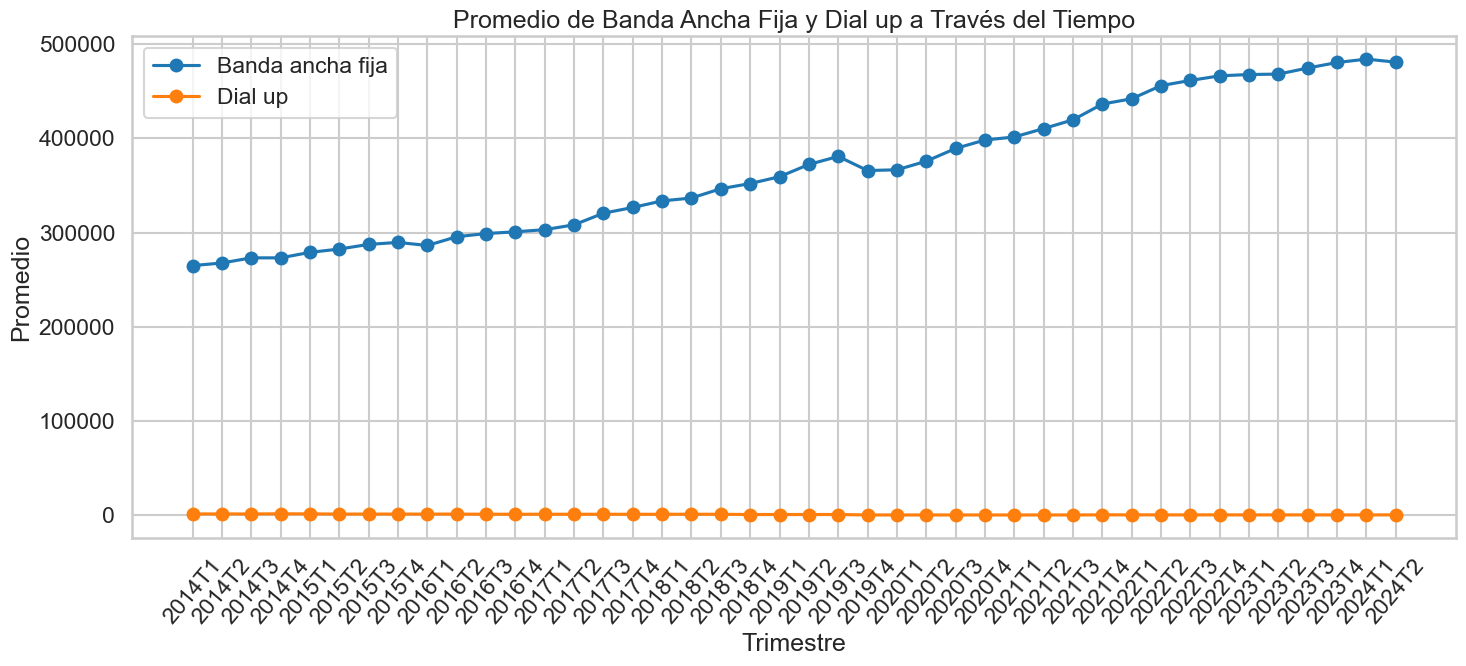

In [114]:
df_promedio = dial_BAf.groupby(['Año', 'Trimestre']).agg({
    'Banda ancha fija': 'mean',
    'Dial up': 'mean'
}).reset_index()

plt.figure(figsize=(15, 7))
plt.plot(df_promedio['Año'].astype(str) + 'T' + df_promedio['Trimestre'].astype(str), df_promedio['Banda ancha fija'], marker='o', label='Banda ancha fija')
plt.plot(df_promedio['Año'].astype(str) + 'T' + df_promedio['Trimestre'].astype(str), df_promedio['Dial up'], marker='o', label='Dial up')

plt.title('Promedio de Banda Ancha Fija y Dial up a Través del Tiempo')
plt.xlabel('Trimestre')
plt.ylabel('Promedio')
plt.grid(True)
plt.xticks(rotation=50)
plt.legend()
plt.tight_layout()
plt.show()


In [115]:
#Verificamos la existencia de outliers
for column in ['Banda ancha fija',	'Dial up']:
    q1 = dial_BAf[column].quantile(0.25)
    q3 = dial_BAf[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = dial_BAf[(dial_BAf[column] < lower_bound) | (dial_BAf[column] > upper_bound)]
    print(f'Columna: {column}, Outliers: {outliers.shape[0]}')

Columna: Banda ancha fija, Outliers: 168
Columna: Dial up, Outliers: 131


Ante todo, mencionamos que los outliers identificados apenas si alcanzan el 10% del total de datos registrados, por lo que no hay una gran injerencia en el análisis de los mismos.

Este gráfico resalta la transición tecnológica en el acceso a internet, mostrando el declive del Dial Up y la adopción masiva de la Banda Ancha Fija como principal forma de conectividad en las diferentes provincias analizadas. Podemos sacar como conclusiones que la banda ancha mantuvo un crecimiento estable, con algunas bajas que tendieron a recuperación.

Actualmente, podemos concluir que la cantidad de conexiones Dial-up es absolutamente exigua en comparación con las conexiones de Banda ancha.